# Section 1: Introduction and preparing your data

In [2]:
import pandas as pd
df = pd.read_csv(r"creditcard_sampledata.csv")
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   Time        8000 non-null   int64  
 2   V1          8000 non-null   float64
 3   V2          8000 non-null   float64
 4   V3          8000 non-null   float64
 5   V4          8000 non-null   float64
 6   V5          8000 non-null   float64
 7   V6          8000 non-null   float64
 8   V7          8000 non-null   float64
 9   V8          8000 non-null   float64
 10  V9          8000 non-null   float64
 11  V10         8000 non-null   float64
 12  V11         8000 non-null   float64
 13  V12         8000 non-null   float64
 14  V13         8000 non-null   float64
 15  V14         8000 non-null   float64
 16  V15         8000 non-null   float64
 17  V16         8000 non-null   float64
 18  V17         8000 non-null   float64
 19  V18         8000 non-null  

In [6]:
# Count the occurrences of fraud and no fraud and print them

occ = df['Class'].value_counts()
occ

Class
0    7983
1      17
Name: count, dtype: int64

In [8]:
print(100*occ/df.shape[0])

Class
0    99.7875
1     0.2125
Name: count, dtype: float64


In [10]:
# Plotting Data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def plot_data(X,y):
    plt.scatter( X[ y == 0, 0], X[ y == 0, 1],label = 'Class #0', alpha = 0.5, linewidth = 0.15 )
    plt.scatter( X[ y == 1, 0], X[ y == 1, 1],label = 'Class #1', alpha = 0.5, linewidth = 0.15 , c = 'r')
    plt.legend()

    return plt.show()

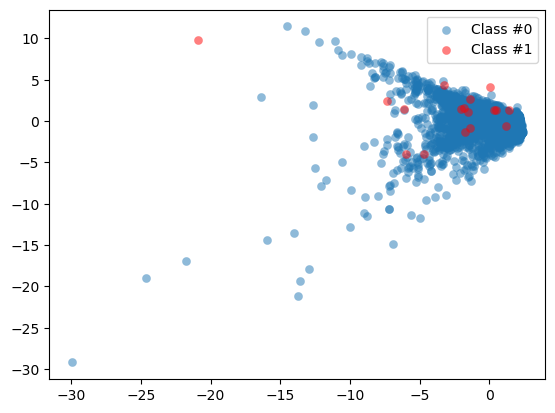

In [14]:
# Create and plot X and y from the prep_data function 

def prep_data(df: pd.DataFrame):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

X, y = prep_data(df)

plot_data(X,y)

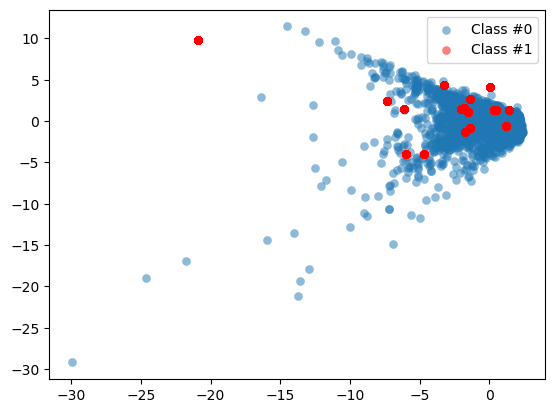

In [16]:
# Oversampling

from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler()

X_resampled, y_resampled = method.fit_resample(X,y)

plot_data(X_resampled, y_resampled)

In [18]:
# Example:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import os

# Setting number of physical cores
os.environ['OMP_NUM_THREADS'] = '1'

# Define resampling method and split into train and test

method = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.8,
    random_state = 1
)

# Apply resampling to train data only

X_resampled, y_resampled = method.fit_resample(X_train, y_train)

# Continue fitting the model and obtain predictions 

model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get performance metrics

predicted = model.predict(X_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1596
           1       0.03      0.50      0.05         4

    accuracy                           0.96      1600
   macro avg       0.51      0.73      0.52      1600
weighted avg       1.00      0.96      0.98      1600



In [20]:
# Simple steps to refresh ML models
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Step 1: split your features and labels into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Step 2: Define which model you want to use
model = LinearRegression()

#Step 3: Fit the model to your training data
model.fit(X_train, y_train)

# Obtain model predictions from your test data
y_predicted = model.predict(X_test)

# Step 5: Compare y_test to predictions and obtain performance metrics
print(r2_score(y_test, y_predicted))

0.3583495687182846


In [22]:
# Get the mean for each group
# grouped = df.groupby('Class').mean().reset_index()

# Implement a rule for stating which cases are catched as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create aas crosstab of flagged fraud cases vs the actual fraud cases

comparison = pd.crosstab(
    df['Class'],
    df['flag_as_fraud'],
    rownames = ['Actual Fraud'],
    colnames = ['Flagged Fraud']
)
comparison

Flagged Fraud,0,1
Actual Fraud,,
0,7949,34
1,13,4


In [24]:
# Create the training and testing sets

from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.33,
    random_state=0
)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(
    X_train,
    y_train
)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report: \n', classification_report(y_test, predicted))

print('Confussion Matrix: \n', confusion_matrix(y_test, predicted))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2630
           1       1.00      0.30      0.46        10

    accuracy                           1.00      2640
   macro avg       1.00      0.65      0.73      2640
weighted avg       1.00      1.00      1.00      2640

Confussion Matrix: 
 [[2630    0]
 [   7    3]]


In [26]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([
    ('SMOTE', resampling),
    ('Logistic Regression', model)
])

In [28]:
# Using a pipeline

# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0
)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix
print(
    'Classification Report: \n',
    classification_report(y_test, y_pred)
)

print(
    'Confussion Matrix: \n',
    confusion_matrix(y_test, y_pred)
)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2390
           1       0.27      0.60      0.38        10

    accuracy                           0.99      2400
   macro avg       0.64      0.80      0.69      2400
weighted avg       1.00      0.99      0.99      2400

Confussion Matrix: 
 [[2374   16]
 [   4    6]]


# Section 2: Fraud detection using labelled data

In [81]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float64)
    y = df.iloc[:, 30]
    y = np.array(y).astype(np.float64)

    return X, y

In [4]:
df2 = pd.read_csv(r"creditcard_sampledata_2.csv")
df2.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [85]:
X, y = prep_data(df2)
y

array([0., 0., 0., ..., 1., 1., 1.])

In [87]:
print(X.shape,'\n',y.shape)

(7300, 28) 
 (7300,)


In [89]:
# Count the total number of observations from the length of y
total = len(y)

# Count the non-fraudulent observations
non_fraud = [i for i in y if i == 0]
nf_count = len(non_fraud)

# Calculatre the percentage of non-fraud observations
percentage = 100 * nf_count / total

# Print the percentage: this is our "natural accuracy" by doing nothing
print(f'{round(percentage,2)}%')

95.89%


In [91]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Define model as the random forest
model = RandomForestClassifier(random_state=5)

In [93]:
X_test.shape, y_test.shape

((1825, 28), (1825,))

In [95]:
#Fit the model to the training set
model.fit(X_train, y_train)

# Obtain predictions from test data
y_pred = model.predict(X_test)

# Print accuracy performance metric
print(accuracy_score(y_test, y_pred))

0.993972602739726


In [96]:
# Import classif report conf matrix and aucroc score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#Obtain the predictions from the RF model
y_pred = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print results

print(
    'Classification Report:\n', 
    classification_report(y_test, y_pred)
)

print(
    'Confusion Matrix:\n',
    confusion_matrix(y_test, y_pred, labels = [0,1])
)

print(
    '\nAUC ROC Score:\n',
    roc_auc_score(y_test, probs[:,1])
)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1755
         1.0       0.98      0.86      0.92        70

    accuracy                           0.99      1825
   macro avg       0.99      0.93      0.96      1825
weighted avg       0.99      0.99      0.99      1825

Confusion Matrix:
 [[1754    1]
 [  10   60]]

AUC ROC Score:
 0.9914774114774115


In [99]:
probs

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [101]:
def plot_pr_curve(recall, precision, avg_precision):
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step = 'post', alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title(
        '2-class Precision-Recall curve: AP = {0:0.2f}'.format(avg_precision)
    )
    plt.show()

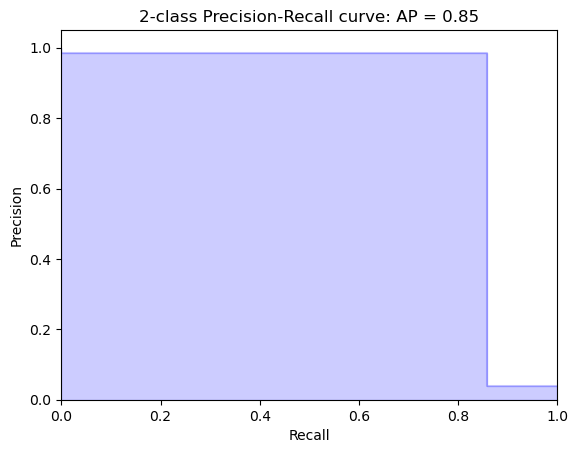

In [103]:
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve

# Calculta avg precision and the PR curve
avg_precision = average_precision_score(y_test, y_pred)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, avg_precision)

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

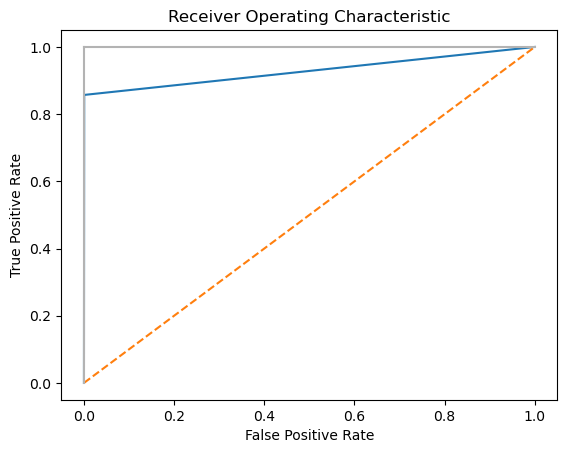

In [106]:
# Create true and false positives rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Plot ROC curve

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.show()

In [108]:
# Define the model with balanced subsample
model = RandomForestClassifier(
    class_weight = 'balanced_subsample',
    n_estimators = 100,
    random_state = 5
)

# Fit training model to training set
model.fit(X_train, y_train)

# Obtain predicted values and probabilities from the model
y_pred = model.predict(X_test)
prob = model.predict_proba(X_test)

# Print results

print(
    'AUC ROC Score (%):\n',
    round(100 * roc_auc_score(y_test, prob[:,1]),2)
)

print(
    '\nClassification Report:\n',
    classification_report(y_test, y_pred)
)

print(
    '\nConfusion Matrix:\n',
    confusion_matrix(y_test, y_pred)
)

AUC ROC Score (%):
 98.33

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1755
         1.0       1.00      0.83      0.91        70

    accuracy                           0.99      1825
   macro avg       1.00      0.91      0.95      1825
weighted avg       0.99      0.99      0.99      1825


Confusion Matrix:
 [[1755    0]
 [  12   58]]


you can see that the model results don't improve drastically. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try.

In [111]:
def get_model_results(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(
        '\nClassification Report:\n',
        classification_report(y_test, y_pred)
    )
    
    print(
        '\nConfusion Matrix:\n',
        confusion_matrix(y_test, y_pred)
    )

In [113]:
# Change the model options
model = RandomForestClassifier(
    bootstrap = True,
    class_weight = {0:1, 1:12}, 
    criterion = 'entropy',
    max_depth = 10,  
    min_samples_leaf = 10, 
    n_estimators = 20, 
    n_jobs = -1,
    random_state = 5
)

# Get results
get_model_results(X_train, y_train, X_test, y_test, model)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1755
         1.0       0.94      0.87      0.90        70

    accuracy                           0.99      1825
   macro avg       0.97      0.93      0.95      1825
weighted avg       0.99      0.99      0.99      1825


Confusion Matrix:
 [[1751    4]
 [   9   61]]


Note: You can see by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. In this exercise you've manually changed the options of the model

In [121]:
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
params = {
    'n_estimators' : [1,30],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [4,8],
    'criterion' : ['gini', 'entropy']
}

# Define model to use
model = RandomForestClassifier(random_state = 5)

# Combine the parameter sets with the model
CV_model = GridSearchCV(
    estimator = model,
    param_grid = params,
    cv = 5,
    scoring = 'recall',
    error_score = 'raise',
    n_jobs = -1
)

# Fit model and get best params

CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [125]:
# Model results using GridSearchCV

# Input optimal params into the model
model = RandomForestClassifier(
    class_weight = {0 : 1, 1 : 12},
    criterion = 'gini',
    max_depth = 8,
    max_features = 'sqrt',
    n_estimators = 30,
    min_samples_leaf = 10,
    n_jobs = -1,
    random_state = 5
)

#Get results
get_model_results(X_train, y_train, X_test, y_test, model)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1755
         1.0       0.97      0.87      0.92        70

    accuracy                           0.99      1825
   macro avg       0.98      0.94      0.96      1825
weighted avg       0.99      0.99      0.99      1825


Confusion Matrix:
 [[1753    2]
 [   9   61]]


You've managed to improve your model even further. The number of false positives has now been slightly reduced even further, which means we are catching more cases of fraud. However, you see that the number of false negatives is still the same. That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with.

In [129]:
# Define the logistic model regression with weights
model = LogisticRegression(class_weight = { 0 : 1 , 1 : 12}, random_state = 5)

# Get results
get_model_results(X_train, y_train, X_test, y_test, model)


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1755
         1.0       0.74      0.91      0.82        70

    accuracy                           0.98      1825
   macro avg       0.87      0.95      0.90      1825
weighted avg       0.99      0.98      0.98      1825


Confusion Matrix:
 [[1732   23]
 [   6   64]]


As you can see the Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Define tree classifiers in the ensemble mode

mod1 = LogisticRegression(class_weight = { 0 : 1 , 1 : 15}, random_state = 5)

mod2 = RandomForestClassifier(
    class_weight = { 0 : 1 , 1 : 12}, 
    random_state = 5,
    criterion = 'gini',
    max_depth = 8,
    max_features = 'sqrt',
    min_samples_leaf = 10,
    n_estimators = 30,
    n_jobs = -1
)

mod3 = DecisionTreeClassifier(random_state = 5, class_weight = 'balanced')

# Combine in ensemble model
ensemble_model = VotingClassifier(
    estimators = [('lr', mod1), ('rf', mod2), ('dt', mod3)],
    voting = 'hard'
)

# Get results
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1755
         1.0       0.94      0.87      0.90        70

    accuracy                           0.99      1825
   macro avg       0.97      0.93      0.95      1825
weighted avg       0.99      0.99      0.99      1825


Confusion Matrix:
 [[1751    4]
 [   9   61]]


.

In [146]:
# Define ensemble model
em_adjusted = VotingClassifier(
    estimators = [('lr', mod1), ('rf', mod2), ('dt', mod3)],
    voting = 'soft',
    weights = [1,4,1],
    flatten_transform = True
)

# Get results
get_model_results(X_train, y_train, X_test, y_test, em_adjusted)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1755
         1.0       0.95      0.87      0.91        70

    accuracy                           0.99      1825
   macro avg       0.97      0.93      0.95      1825
weighted avg       0.99      0.99      0.99      1825


Confusion Matrix:
 [[1752    3]
 [   9   61]]


In [148]:
em_adjusted.estimators_

[LogisticRegression(class_weight={0: 1, 1: 15}, random_state=5),
 RandomForestClassifier(class_weight={0: 1, 1: 12}, max_depth=8,
                        min_samples_leaf=10, n_estimators=30, n_jobs=-1,
                        random_state=5),
 DecisionTreeClassifier(class_weight='balanced', random_state=5)]

The weight option allows you to play with the individual models to get the best final mix for your fraud detection model.

.

# Section 3: Fraud detection using unlabelled data

.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df3 = pd.read_csv(r"banksim.csv")
df3.head()

,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7200 non-null   int64  
 1   age         7200 non-null   object 
 2   gender      7200 non-null   object 
 3   category    7200 non-null   object 
 4   amount      7200 non-null   float64
 5   fraud       7200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 337.6+ KB


In [21]:
df3.groupby('category').mean(numeric_only = True).round(2)

,Unnamed: 0,amount,fraud
category,,,
es_barsandrestaurants,267372.71,43.84,0.02
es_contents,335906.15,55.17,0.00
es_fashion,286952.23,59.78,0.02
es_food,334978.98,35.22,0.00
es_health,335355.18,126.60,0.24
es_home,248312.58,120.69,0.21
es_hotelservices,280138.55,172.76,0.55
es_hyper,244440.71,46.79,0.12
es_leisure,186541.31,229.76,1.00


In [23]:
df3.groupby('age').mean(numeric_only = True).round(2)

,Unnamed: 0,amount,fraud
age,,,
0,327520.45,49.47,0.05
1,290985.51,35.62,0.03
2,296867.96,37.23,0.03
3,291471.42,37.28,0.02
4,306041.40,36.20,0.04
5,290885.96,37.55,0.02
6,299193.72,36.70,0.02
U,288372.18,39.12,0.00


In [25]:
df3['age'].value_counts()

age
2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: count, dtype: int64

you can see the average amount spent as well as fraud occurrence is rather similar across groups. Age group '0' stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.

In [32]:
# Creates 2 datasets with fraud and non-fraud data
mask1 = df3['fraud'] == 1
mask2 = df3['fraud'] == 0

fraud = df3[mask1]
non_fraud = df3[mask2]

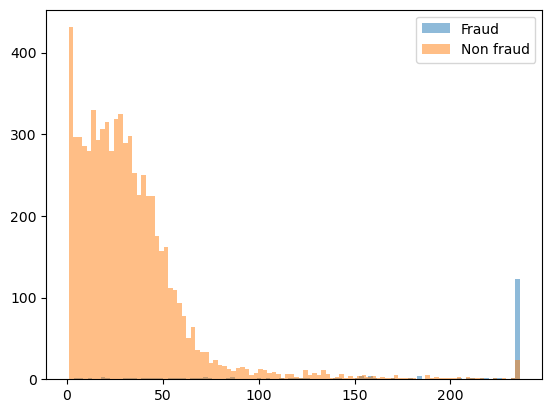

In [46]:
# Plot histograms of the amounts in the partitions

plt.hist(
    x = fraud['amount'],
    alpha = 0.5,
    label = 'Fraud',
    bins = 100
)

plt.hist(
    x = non_fraud['amount'],
    alpha = 0.5,
    label = 'Non fraud',
    bins = 100
)

plt.legend()

plt.show()

As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, you can see that the fraudulent transactions tend to be on the larger side relative to normal obervations. This is good news, as it helps us later in detecting fraud from non-fraud.